# **CVL - ASSIGNMENT 1**

##**IMAGE ENHANCEMENT**

In [1]:
#Impor library yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#Didefinisikan fungsi untuk menampilkan image input dan menyimpan image output
def show_and_save(img_input, img_output, output_path, title_input='Original Image', title_output='Enhanced Image'):
  #Setting image dan histogram
  fig, axes = plt.subplots(2, 2, figsize=(10,8))

  #Image
  axes[0,0].imshow(cv2.cvtColor(img_input, cv2.COLOR_BGR2RGB))
  axes[0,0].set_title(title_input)
  axes[0,0].axis('off')
  axes[0,1].imshow(cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB))
  axes[0,1].set_title(title_output)
  axes[0,1].axis('off')

  #Histogram
  gray_input = cv2.cvtColor(img_input, cv2.COLOR_BGR2GRAY)
  gray_output = cv2.cvtColor(img_output, cv2.COLOR_BGR2GRAY)
  axes[1,0].hist(gray_input.flatten(), bins=256, color='gray')
  axes[1,0].set_title('Histogram (Original)')
  axes[1,1].hist(gray_output.flatten(), bins=256, color='gray')
  axes[1,1].set_title('Histogram (Enhanced)')
  plt.tight_layout()
  plt.show()

  #Simpan hasil output
  cv2.imwrite(output_path, img_output)
  print(f"Hasil disimpan di : {output_path}")

#Cek folder output
os.makedirs('output', exist_ok=True)  #Output disimpan di folder output ini

Image Enhancement : Dark Image


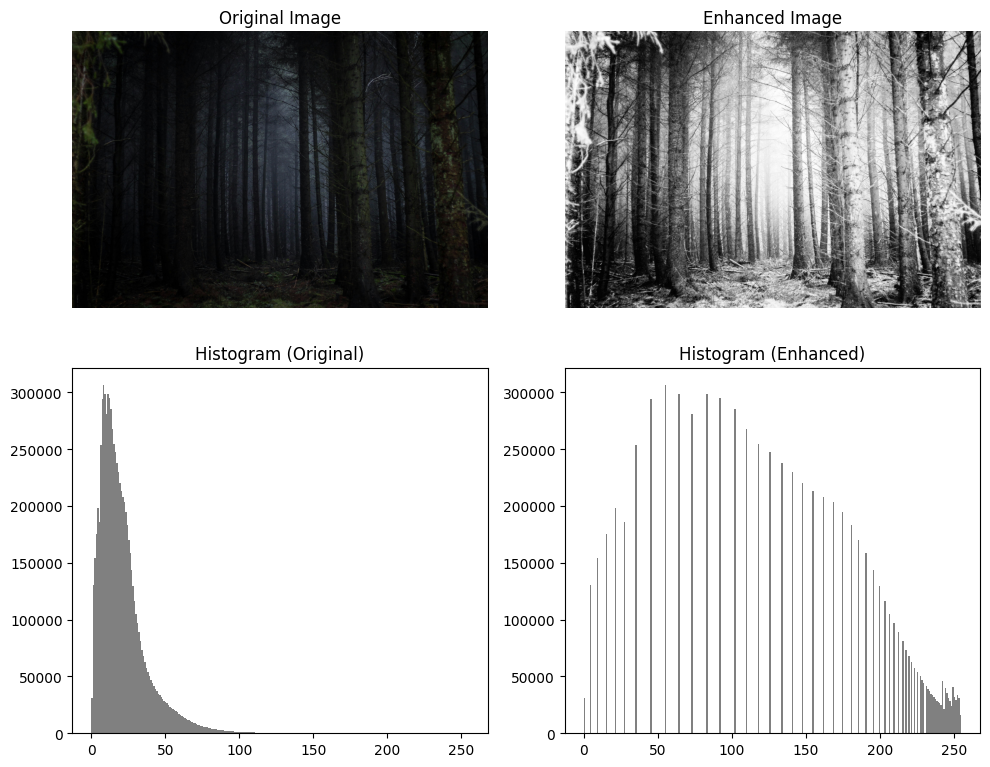

Hasil disimpan di : output/enhanced_dark.jpg


In [3]:
#Dark Image (Histogram Equalization)
img_dark = cv2.imread('dark.jpg')
if img_dark is not None:
  gray = cv2.cvtColor(img_dark, cv2.COLOR_BGR2GRAY)
  eq = cv2.equalizeHist(gray)
  img_eq = cv2.cvtColor(eq, cv2.COLOR_GRAY2BGR)
  print("Image Enhancement : Dark Image")
  show_and_save(img_dark, img_eq, 'output/enhanced_dark.jpg', 'Original Image', 'Enhanced Image')
else:
  print("Error loading image")

## Analisis Image Enhancement untuk Dark Image

Untuk mengatasi tipe image berupa dark image, digunakan metode histogram equalization yang diterapkan pada citra grayscale lalu dikonversi kembali ke BGR.

Selanjutnya, berdasarkan perbandingan antara image asli dan enhanced image, dapat dilihat bahwa image asli yang awalnya sangat gelap dan detailnya hampir tidak terlihat, menjadi jauh lebih terang. Objek dan tekstur yang sebelumnya tidak terlihat jelas pada image asli menjadi dapat terlihat pada enhanced image.

Sedangkan untuk histogram, dapat diamati bahwa histogram gambar asli terkumpul di sisi kiri (nilai piksel rendah), yang mengindikasikan bahwa sebagian besar piksel memiliki warna gelap. Setelah mengalami proses histogram equalization maka histogram tersebut menjadi lebih merata dan menyebar di seluruh rentang nilai 0-255. Proses ini secara efektif meningkatkan kontras dan mencerahkan gambar, membuat detail yang tersembunyi menjadi terlihat.

Image Enhancement : Bright Image


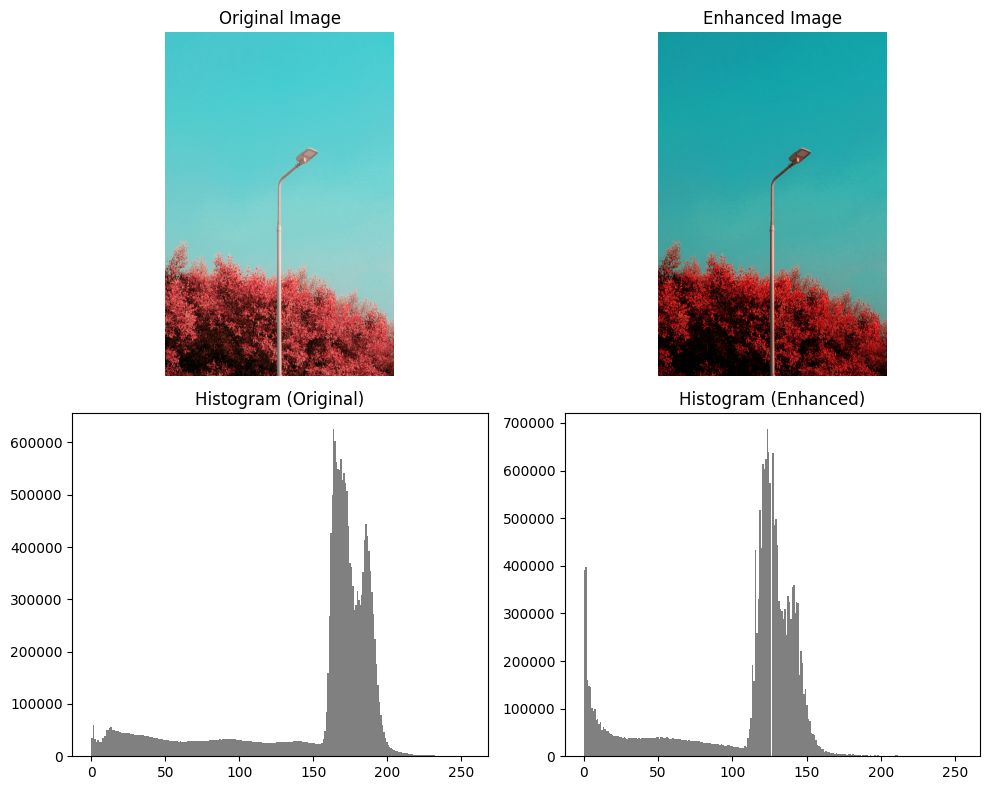

Hasil disimpan di : output/enhanced_bright.jpg


In [4]:
#Bright Image (Gamma Correction)
img_bright = cv2.imread('bright.jpg')
if img_bright is not None:
  gamma = 0.5
  inv_gamma = 1.0 / gamma
  table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype('uint8')
  img_gamma = cv2.LUT(img_bright, table)
  print("Image Enhancement : Bright Image")
  show_and_save(img_bright, img_gamma, 'output/enhanced_bright.jpg', 'Original Image', 'Enhanced Image')
else:
  print("Error loading image")

## Analisis Image Enhancement untuk Bright Image

Untuk mengatasi tipe image berupa bright image, dipilih koreksi gamma dengan LUT, yaitu Look-Up Table yang akan digunakan untuk mempercepat transformasi nilai intensitas piksel.

Pada gambar di atas dapat diamati bahwa image asli terlalu terang, terutama di area langit. Setelah koreksi gamma, kelebihan cahaya berhasil dikurangi dadn detail yang sebelumnya hilang karena over-brightness mulai terlihat kembali di bagian daun.

Selanjutnya pada histogram, dapat dilihat bahwa histogram dari image asli terkumpul di sisi kanan (nilai piksel tinggi). Setelah koreksi gamma, histogram bergeser ke arah kiri, menunjukkan bahwa nilai piksel yang terang telah diturunkan. Pergeseran ini efektif menurunkan kecerahan berlebih dan mengembalikan detail di area yang terlalu terang.

Image Enhancement : Low Contrast Image


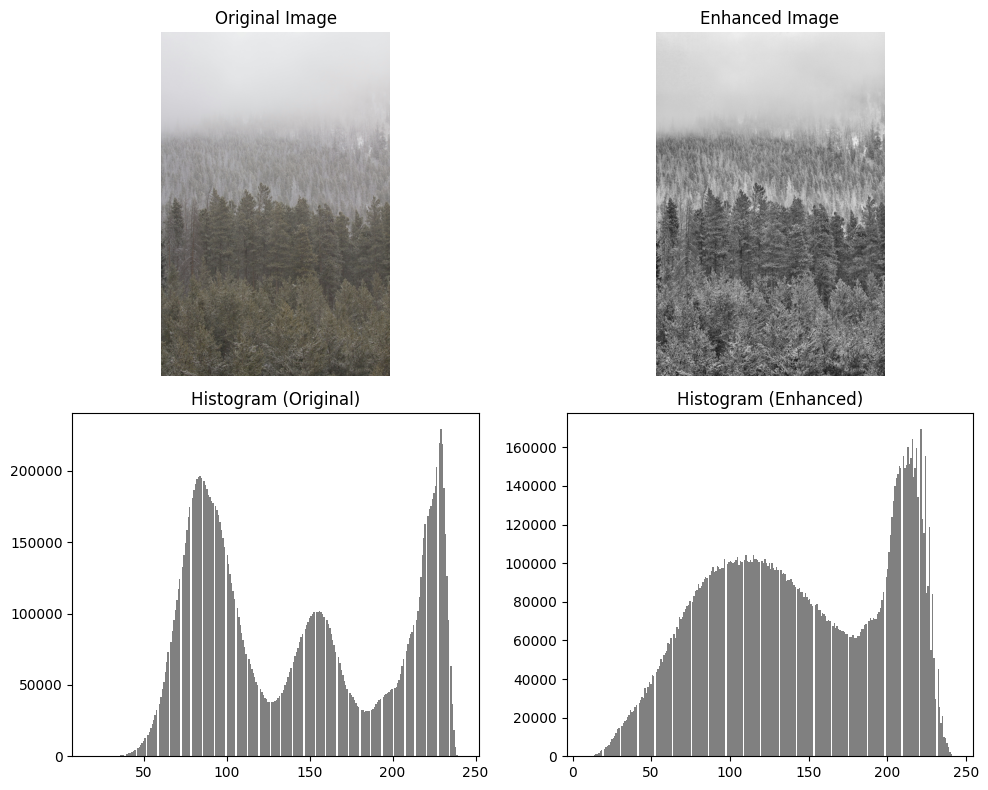

Hasil disimpan di : output/enhanced_lowcontrast.jpg


In [5]:
#Low Contrast Image (CLAHE)
img_lowcont = cv2.imread('lowcontrast.jpg')
if img_lowcont is not None:
  gray = cv2.cvtColor(img_lowcont, cv2.COLOR_BGR2GRAY)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl1 = clahe.apply(gray)
  img_clahe = cv2.cvtColor(cl1, cv2.COLOR_GRAY2BGR)
  print("Image Enhancement : Low Contrast Image")
  show_and_save(img_lowcont, img_clahe, 'output/enhanced_lowcontrast.jpg', 'Original Image', 'Enhanced Image')
else:
  print("Error loading image")

## Analisis Image Enhancement untuk Low Contrast Image

Untuk mengatasi tipe image berupa low contrast image, dipilih CLAHE (Contrast Limited Adaptive Histogram Equalization) yang akan digunakan untuk meningkatkan kontras secara lokal.

Pada image asli dapat dilihat bahwa objek terlihat memudar dan kurang jelas. Setelah penerapan CLAHE, kontras gambar meningkat secara signifikan baik pada warna dan juga detail, terutama pada objek dan latar belakang, menjadi lebih hidup dan tajam serta mudah dibedakan antara objek dan latar belakangnya.

Sedangkan pada histogram, dapat diamati bahwa histogram dari image asli sempit dan tidak merata, menunjukkan rentang kontras yang rendah. Setelah CLAHE, histogram menjadi lebih lebar dan merata, serta mencakup rentang nilai yang lebih besar. CLAHE meningkatkan kontras secara lokal pada setiap bagian gambar, sehingga hasilnya lebih baik dibandingkan equalization biasa untuk tipe image ini.

Image Enhancement : Noise Image


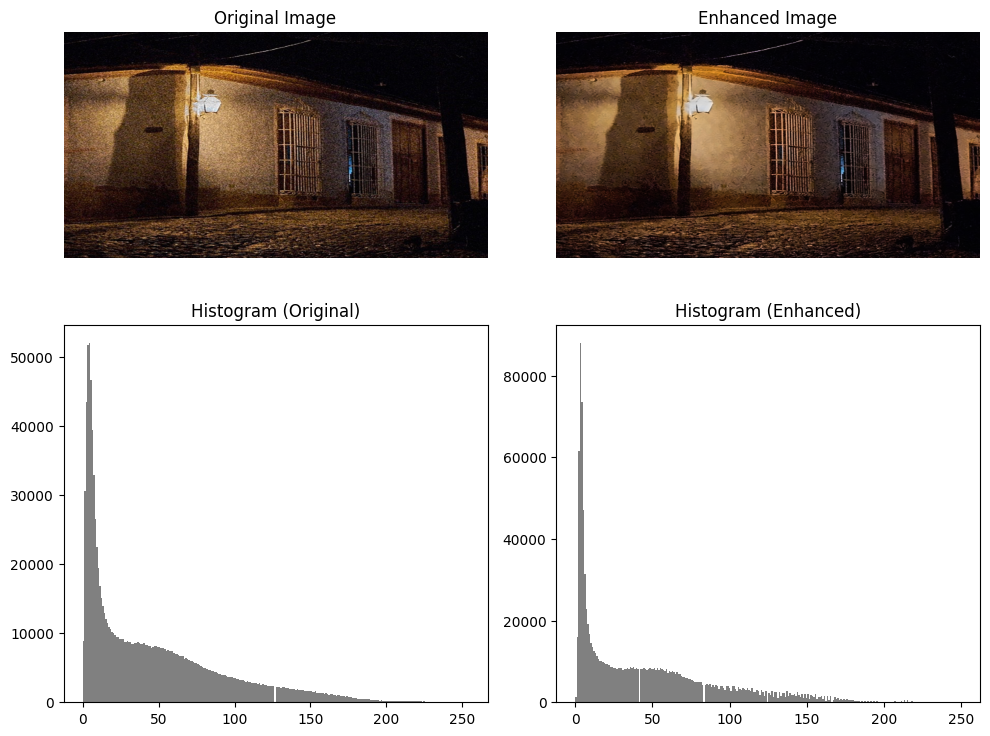

Hasil disimpan di : output/enhanced_noise.jpg


In [6]:
#Noise Image (Denoising)
img_noisy = cv2.imread('noise.jpg')
if img_noisy is not None:
  img_denoised = cv2.fastNlMeansDenoisingColored(img_noisy, None, 10, 10, 7, 21)
  print("Image Enhancement : Noise Image")
  show_and_save(img_noisy, img_denoised, 'output/enhanced_noise.jpg', 'Original Image', 'Enhanced Image')
else:
  print("Error loading image")

## Analisis Image Enhancement untuk Noise Image

Untuk mengatasi tipe image berupa noise image, dipilih denoising yang akan digunakan untuk mengurangi noise.

Pada image asli dapat diamati bahwa image asli memiliki bintik-bintik (noise) yang jelas. Setelah proses denoising, bintik-bintik tersebut berkurang drastis, menghasilkan gambar yang lebih halus dan objek yang lebih mudah terlihat.

Selanjutnya dapat diamati pula untuk histogramnya tidak menunjukkan perubahan yang signifikan, karena filter denoising berfokus pada piksel-piksel individual yang dianggap sebagai noise, bukan pada distribusi intensitas warna secara keseluruhan. Karena tujuan dari denoising bukan mengubah kontras atau kecerahan global.

Image Enhancement : Low Resolution Image


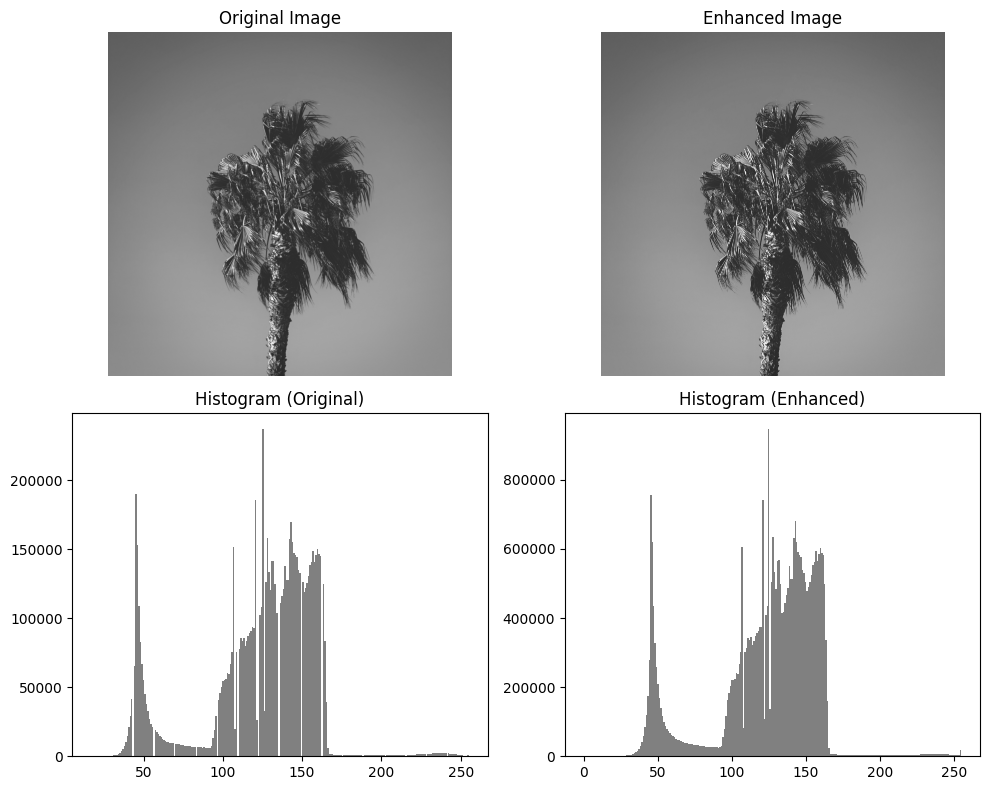

Hasil disimpan di : output/enhanced_lowres.jpg


In [7]:
#Low Resolution Image (Upsampling Bicubic)
img_lowres = cv2.imread('lowres.jpg')
if img_lowres is not None:
  img_upsampled = cv2.resize(img_lowres, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
  print("Image Enhancement : Low Resolution Image")
  show_and_save(img_lowres, img_upsampled, 'output/enhanced_lowres.jpg', 'Original Image', 'Enhanced Image')
else:
  print("Error loading image")

## Analisis Image Enhancement untuk Low Resolution Image

Untuk mengatasi tipe image berupa low resolution image, dipilih metode interpolasi, yaitu Bicubic Upsampling yang akan digunakan untuk memperbesar image.

Pada image asli dapat diamati bahwa imagenya memiliki resolusi rendah dan terlihat pecah. Setelah upsampling dengan interpolasi bikubik, resolusi gambar meningkat dan gambar terlihat lebih halus dan detailnya lebih baik. Namun detail asli tetap terbatas karena sumber data awal resolusinya rendah.

Sedangkan pada histogramnya dapat diamati bahwa histogram tidak mengalami perubahan signifikan dalam distribusinya, karena upsampling berfokus pada menciptakan piksel baru di antara piksel yang sudah ada untuk meningkatkan resolusi, bukan mengubah distribusi warna.

Image Enhancement : Too Sharp Image


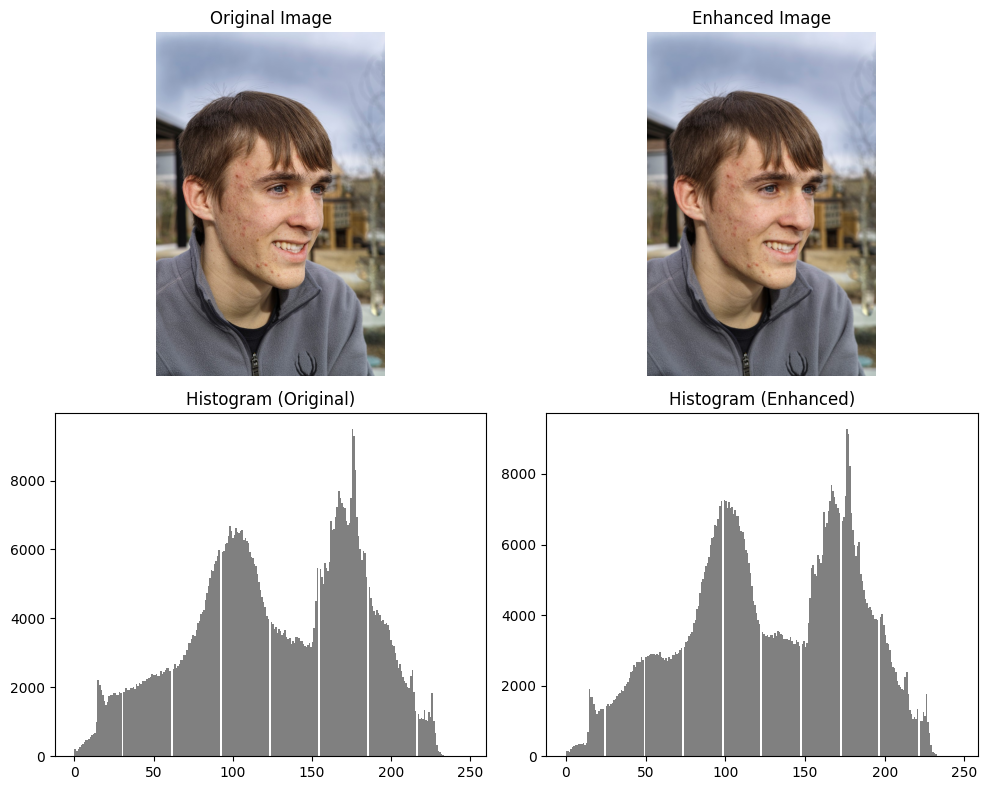

Hasil disimpan di : output/enhanced_toosharp.jpg


In [8]:
#Too Sharp Image (Gaussian Blur)
img_toosharp = cv2.imread('toosharp.jpeg')
if img_toosharp is not None:
  img_blurred = cv2.GaussianBlur(img_toosharp, (3,3), 1)
  print("Image Enhancement : Too Sharp Image")
  show_and_save(img_toosharp, img_blurred, 'output/enhanced_toosharp.jpg', 'Original Image', 'Enhanced Image')
else:
  print("Error loading image")

## Analisis Image Enhancement untuk Too Sharp Image

Untuk mengatasi tipe image berupa too sharp image, dipilih Gaussian Blur dengan kernel kecil.

Pada image asli dapat diamati bahwa ketajaman pada image asli ini awalnya berlebihan. Namun setelah mengimplementasikan Gaussian Blur maka image menjadi lebih halus dan alami tanpa tepi yang terlalu tajam. Beberapa detail kecil dan noise yang muncul akibat ketajaman berlebih berhasil dikurangi.

Sedangkan untuk histogram dapat dilihat bahwa histogram menunjukkan sedikit penumpulan di area ekstrim (terang dan gelap). Ini terjadi karena blurring melakukan pengambilan rata-rata nilai piksel, lalu mengurangi perbedaan ekstrim dan menggeser nilai piksel ke arah rata-rata.

Image Enhancement : Dark Object on Dark Background Image


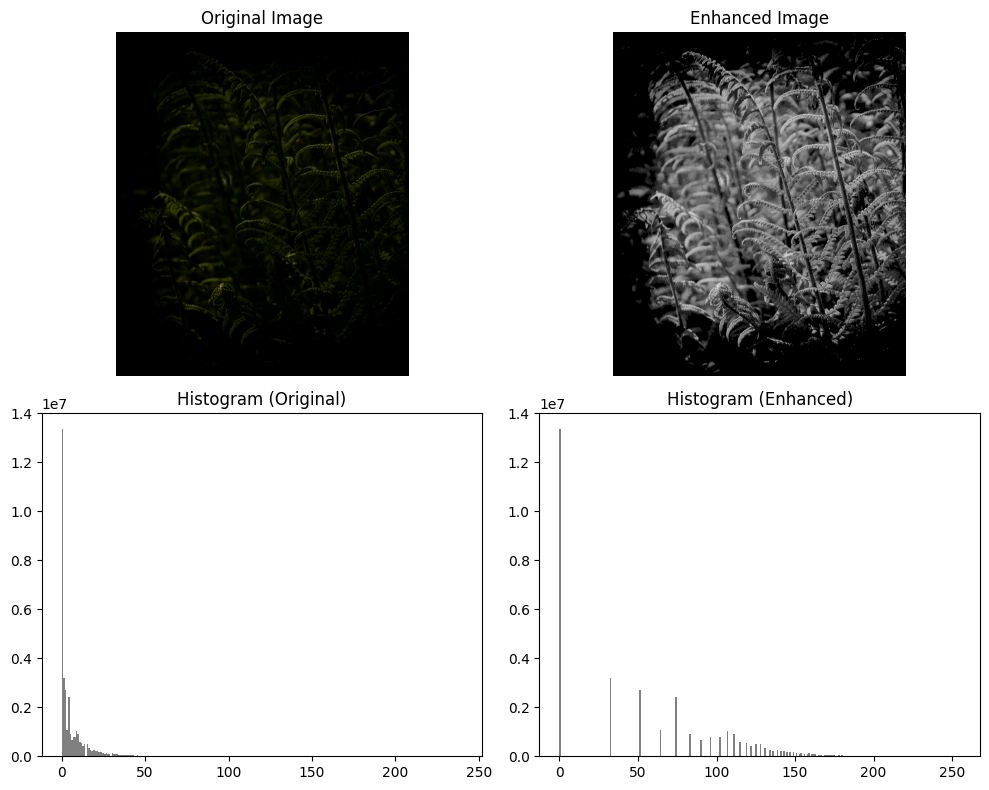

Hasil disimpan di : output/enhanced_darkobject.jpg


In [9]:
#Dark Object on Dark Background (Log Transform)
img_darkobj = cv2.imread('darkobj.jpg')
if img_darkobj is not None:
  gray = cv2.cvtColor(img_darkobj, cv2.COLOR_BGR2GRAY)
  #Mencegah kemungkinan log(0) atau log(negative)
  max_val = np.max(gray)
  if max_val > 0:
    c = 255 / np.log(1 + max_val)
    log_img = c * np.log(1 + gray.astype(np.float32))
    log_img = np.clip(log_img, 0, 255).astype(np.uint8)
    img_log = cv2.cvtColor(log_img, cv2.COLOR_GRAY2BGR)
    print("Image Enhancement : Dark Object on Dark Background Image")
    show_and_save(img_darkobj, img_log, 'output/enhanced_darkobject.jpg', 'Original Image', 'Enhanced Image')
  else:
    print("Tidak bisa diproses karena image sangat gelap")
else:
  print("Error loading image")

## Analisis Image Enhancement untuk Dark Object on Dark Background Image

Untuk mengatasi tipe image berupa dark object di dark background, dipilih transformasi logaritma yang akan diterapkan pada intensitas piksel.

Pada image asli, dapat diamati bahwa objek ynag tadinya sangat sulit terlihat karena hampir sama gelapnya dengan background menjadi lebih jelas. Objek pada enhanced image terlihat lebih jelas dan terpisah dari latar belakangnya.

Sedangkan untuk histogramnya, dapat dilihat bahwa pada histogram image asli terkumpul di area piksel gelap (sisi kiri). Transformasi logaritma meregangkan nilai-nilai piksel gelap, menyebabkan histogram bergeser ke kanan dan menyebar. Dapat dikatakan bahwa transformasi ini meningkatkan kontras di area gelap, membuat detail yang sebelumnya tidak terlihat menjadi jelas.